<a href="https://colab.research.google.com/github/CD-AC/Master_AI/blob/main/Actividad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidad Internacional de La Rioja (UNIR) - M√°ster Universitario en Inteligencia Artificial - T√©cnicas de aprendizaje autom√°tico**

***
Integrantes del grupo:

Alejandro Humberto Marquez Reyes

Alberto Rufino Apaza Mamani

Harol Smith Estevez GIl

Juan David Rodr√≠guez Garz√≥n

Sandra Milena P√©rez Orjuela

Fecha: 17 de Febrero de 2025
***

_T√©cnicas de Aprendizaje Autom√°tico_

_M√°ster Universitario en Inteligencia Artificial_

# Caso Grupal: Clasificaci√≥n de mensajes de odio

## Objetivos

Mediante este trabajo se pretende que el estudiante ponga en pr√°ctica la aplicaci√≥n de un proceso completo de machine learning a la clasificaci√≥n de mensajes de odio.

El objetivo es generar un proyecto completo de machine learning para clasificar mensajes de odio. Debe detallar los pasos que hay que realizar para la clasificaci√≥n de mensajes, as√≠ como una evaluaci√≥n de los resultados.

- Decidir la t√©cnica de aprendizaje autom√°tico a utilizar
- Analizar diferentes modelos de aprendizaje supervisado para la clasificaci√≥n de mensajes de odio.
- Evaluar los resultados obtenidos por cada modelo en t√©rminos de precisi√≥n, recall, y f1.

## Descripci√≥n de la actividad

La empresa SureTech Innovations quiere implementar un clasificador de mensajes de odio. Para ello se deben entrenar diferentes modelos de clasificaci√≥n, evaluar el rendimiento de cada uno de ellos, y finalmente, decidir cu√°l ser√≠a el mejor.

Para llevar a cabo esta actividad cuentas con el dataset simplificado de HateSpeech en la siguiente URL: https://github.com/almudenaris/TAA/blob/main/out.csv

Los pasos que se deben seguir para desarrollar esta actividad son:

1.	¬øQu√© tarea de aprendizaje autom√°tico se pretende resolver? ¬øQu√© an√°lisis previos ser√≠an necesarios realizar para saber si es posible construir el modelo que buscamos? Realiza un an√°lisis exploratorio de datos adecuado a la tarea que se pretende resolver y al dataset facilitado. Explica con detalle, en base a la tarea que se quiere resolver, qu√© an√°lisis ser√≠an necesarios realizar sobre los datos.

2.	En base a la tarea que se pide realizar y a las caracter√≠sticas del dataset decide qu√© algoritmo o algoritmos se deben utilizar. Implementa tres modelos. Realiza los entrenamientos necesarios para cada uno de ellos. Explica por qu√© son convenientes los algoritmos elegidos.

3.	Realiza una explicaci√≥n de las m√©tricas de evaluaci√≥n que se deben utilizar para valorar la bondad del modelo. Justifica la decisi√≥n de las elegidas. ¬øC√≥mo habr√≠a que evaluar el modelo? Eval√∫a los modelos entrenados en el punto anterior y explica los resultados obtenidos.


## Dataset

El dataset original proporcionado en el proyecto transversal ha sido adaptado para la realizaci√≥n de esta actividad. Esa adaptaci√≥n ha incluido:

- Eliminaci√≥n de nulos y duplicados
- Eliminaci√≥n de URLs, emojis y menciones a los peri√≥dicos
- Eliminaci√≥n de filas vac√≠as
- Limpieza y homogeneizaci√≥n de datos.
    - Convertir la totalidad del texto a min√∫scula
    - Eliminar signos de puntuaci√≥n
    - Eliminar n√∫meros
    - Eliminar espacios en blanco adicionales
    - Eliminar palabras con longitud menor a 2 caracteres
    - Eliminar stopwords
    - Tokenizaci√≥n
    - Lematizaci√≥n
- Proceso de extracci√≥n de caracter√≠sticas
    - Conteo de palabras positivas (A)
    - Conteo de palabras negativas (B)
    - Conteo del n√∫mero de bigrams m√°s comunes (C)
    - Conteo del n√∫mero de menciones a otros usuarios (D)
    - Categor√≠a del sentimiento seg√∫n librer√≠a ‚Äòpysentimiento‚Äô en espa√±ol (E)

- Estandarizaci√≥n de las caracter√≠sticas (A_t,..E_t)
- Combinaci√≥n de caracter√≠sticas f1*fi (iA..iE) (Valor1,..Valor10).

## EDA


In [ ]:
import pandas as pd
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive (aj√∫stala si est√° dentro de una subcarpeta)
file_path = "/content/drive/My Drive/Colab Notebooks/out.csv"

# Cargar el dataset en un DataFrame
df = pd.read_csv(file_path)

In [4]:
# Comprender la estructura del dataset

# Mostrar el n√∫mero de filas y columnas
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")

# Mostrar informaci√≥n general del dataset
print("Informaci√≥n del dataset:")
print(df.info())

# Mostrar las primeras filas
print("\nPrimeras filas del dataset:")
print(df.head())



El dataset tiene 10000 filas y 22 columnas.

Informaci√≥n del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A           10000 non-null  int64  
 1   B           10000 non-null  int64  
 2   C           10000 non-null  int64  
 3   D           10000 non-null  int64  
 4   E           10000 non-null  int64  
 5   comentario  10000 non-null  object 
 6   label       10000 non-null  float64
 7   A_t         10000 non-null  float64
 8   B_t         10000 non-null  float64
 9   C_t         10000 non-null  float64
 10  D_t         10000 non-null  float64
 11  E_t         10000 non-null  float64
 12  Valor_1     10000 non-null  float64
 13  Valor_2     10000 non-null  float64
 14  Valor_3     10000 non-null  float64
 15  Valor_4     10000 non-null  float64
 16  Valor_5     10000 non-null  float64
 17  Valor_6     10000 non-null  float64
 

**Informaci√≥n General de Dataset**

- Total de filas: 10000
- Total de columnas: 22
- Tama√±o en memoria: 1.7 MB
- 5 columnas de tipo int64 ‚Üí Variables enteras (A, B, C, D, E).
- 1 columna de tipo object ‚Üí Texto en "comentario".
- 16 columnas de tipo float64 ‚Üí Variables num√©ricas transformadas o generadas (A_t, B_t, ..., Valor_10).


In [5]:
######## 1.2 An√°lisis de valores faltantes y duplicados ######

print("\nValores nulos por columna:")
print(df.isnull().sum())

# Contar registros duplicados
duplicados = df.duplicated().sum()
print(f"\nN√∫mero de registros duplicados: {duplicados}")


Valores nulos por columna:
A             0
B             0
C             0
D             0
E             0
comentario    0
label         0
A_t           0
B_t           0
C_t           0
D_t           0
E_t           0
Valor_1       0
Valor_2       0
Valor_3       0
Valor_4       0
Valor_5       0
Valor_6       0
Valor_7       0
Valor_8       0
Valor_9       0
Valor_10      0
dtype: int64

N√∫mero de registros duplicados: 539


Se confirman 539 registros duplicados

In [6]:
# Se eliminan datos duplicados
df = df.drop_duplicates()
print(f"N√∫mero de registros despu√©s de eliminar duplicados: {df.shape[0]}")

N√∫mero de registros despu√©s de eliminar duplicados: 9461


El total de registros despu√©s de eliminar los duplicados son 9461

**An√°lisis de Valores Nulos**
- No hay valores nulos en ninguna columna del dataset. Esto indica que el preprocesamiento ha sido bien aplicado y no hay necesidad de eliminar o completar valores faltantes.

**An√°lisis de Registros Duplicados**
- Se han encontrado 539 registros duplicados en el dataset. Los comentarios pueden haber sido recogidos m√°s de una vez en la base de datos original o puede haber comentarios iguales publicados por diferentes personas. Otra posibilidad podr√≠a ser que durante la limpieza, algunos comentarios pudieron haber sido modificados, pero no eliminados si eran id√©nticos a otros.
- Se procede a eliminar registros duplicados y a continuaci√≥n se evalua la distribuci√≥n de la clase.

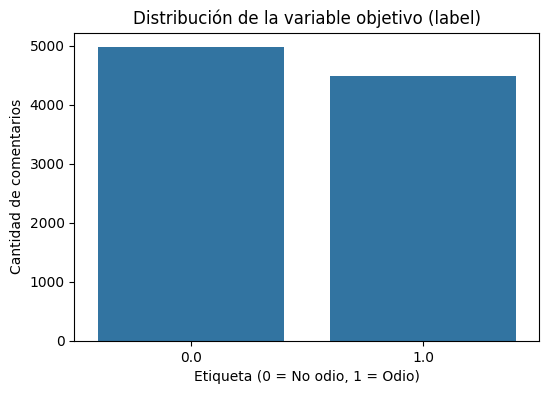


Distribuci√≥n de etiquetas en porcentaje:
label
0.0    52.531445
1.0    47.468555
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

###### 1.3 Distribuci√≥n de la variable objetivo (label) ######

plt.figure(figsize=(6,4))
sns.countplot(x=df["label"])
plt.title("Distribuci√≥n de la variable objetivo (label)")
plt.xlabel("Etiqueta (0 = No odio, 1 = Odio)")
plt.ylabel("Cantidad de comentarios")
plt.show()

# Mostrar porcentaje de cada clase
print("\nDistribuci√≥n de etiquetas en porcentaje:")
print(df["label"].value_counts(normalize=True) * 100)

**An√°lisis de la distribuci√≥n de etiquetas**
- Sin eliminar los datos duplicados se observ√≥ que las clases est√°ban perfectamente balanceadas: 50% de los comentarios est√°n etiquetados como 0 (no discurso de odio) y 50% de los comentarios est√°n etiquetados como 1 (discurso de odio).

- Despu√©s de eliminar los 539 registros duplicados, la nueva distribuci√≥n de etiquetas es: 52.53% de los comentarios est√°n etiquetados como 0 (no discurso de odio) y 47.47% de los comentarios est√°n etiquetados como 1 (discurso de odio).
- Aunque el dataset ya no es 50% - 50%, la diferencia del 5% no es tan grande como para generar problemas graves en el modelo.


Estad√≠sticas sobre la longitud de los comentarios:
       longitud_comentario  cantidad_palabras
count          9461.000000        9461.000000
mean           1584.783321           1.010675
std            2006.662444           0.130830
min               5.000000           1.000000
25%              45.000000           1.000000
50%             458.000000           1.000000
75%            2764.000000           1.000000
max           22463.000000           6.000000


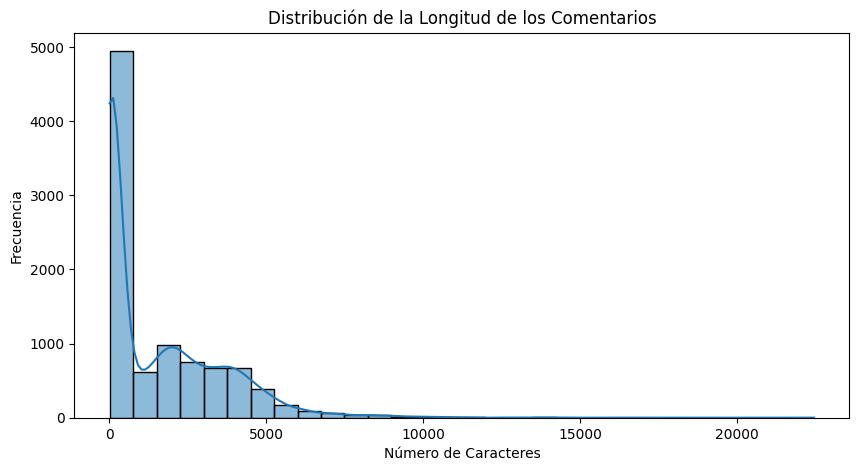

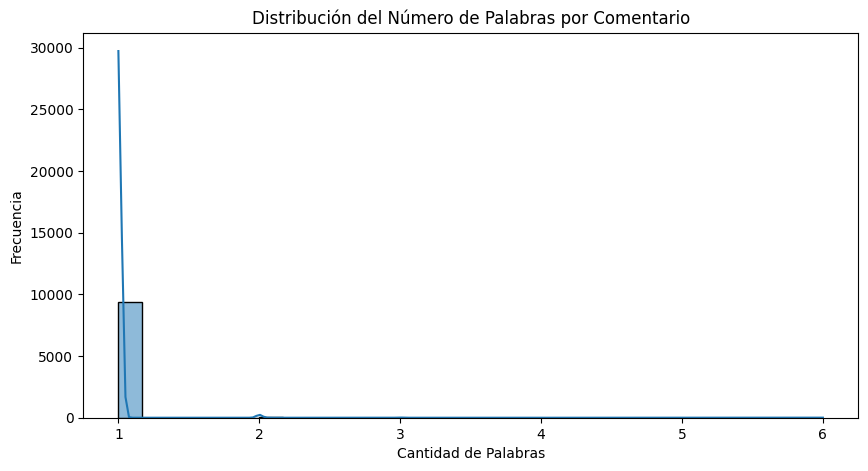

In [ ]:
import numpy as np

# Calcular estad√≠sticas clave
df["longitud_comentario"] = df["comentario"].apply(lambda x: len(str(x)))
df["cantidad_palabras"] = df["comentario"].apply(lambda x: len(str(x).split()))

# Estad√≠sticas de longitud de comentarios
print("\nEstad√≠sticas sobre la longitud de los comentarios:")
print(df[["longitud_comentario", "cantidad_palabras"]].describe())

# Distribuci√≥n del n√∫mero de caracteres por comentario
plt.figure(figsize=(10,5))
sns.histplot(df["longitud_comentario"], bins=30, kde=True)
plt.title("Distribuci√≥n de la Longitud de los Comentarios")
plt.xlabel("N√∫mero de Caracteres")
plt.ylabel("Frecuencia")
plt.show()

# Distribuci√≥n del n√∫mero de palabras por comentario
plt.figure(figsize=(10,5))
sns.histplot(df["cantidad_palabras"], bins=30, kde=True)
plt.title("Distribuci√≥n del N√∫mero de Palabras por Comentario")
plt.xlabel("Cantidad de Palabras")
plt.ylabel("Frecuencia")
plt.show()

**An√°lisis general**
- Cantidad de comentarios analizados: 9,461 (despu√©s de eliminar duplicados).
- Longitud promedio de un comentario: 1,584 caracteres.
- Desviaci√≥n est√°ndar (std): 2,006 caracteres. Hay una gran variabilidad en la longitud de los comentarios.
- Comentario m√°s corto: 5 caracteres.
- Comentario m√°s largo: 22,463 caracteres (muy extenso).
- **Obs:** Hay comentarios extremadamente cortos y muy largos, lo que puede generar problemas en el modelo si no se maneja adecuadamente.

**An√°lisis de la cantidad de palabras**
- La media es solo de 1.01 palabras. Esto significa que la mayor√≠a de los comentarios tienen una sola palabra.

- **Distribuci√≥n de palabras por comentario:**
    - M√≠nimo: 1 palabra.
    - M√°ximo: 6 palabras (muy pocos casos).
    - Percentiles (25%, 50%, 75%): Todos indican 1 palabra por comentario.



Resumen de las variables num√©ricas:
                 A            B            C            D            E  \
count  9461.000000  9461.000000  9461.000000  9461.000000  9461.000000   
mean      0.966811    27.519501     5.921573     0.094599     2.061833   
std       1.773650    34.398577     7.436140     0.354723     2.693403   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     0.000000   
50%       0.000000     9.000000     3.000000     0.000000     0.000000   
75%       1.000000    48.000000     8.000000     0.000000     6.000000   
max      24.000000   328.000000    88.000000     6.000000     6.000000   

             label          A_t          B_t          C_t          D_t  ...  \
count  9461.000000  9461.000000  9461.000000  9461.000000  9461.000000  ...   
mean      0.474686     0.746055     0.965303     1.076528    -0.235248  ...   
std       0.499385     1.897007     1.691942     1.874382 

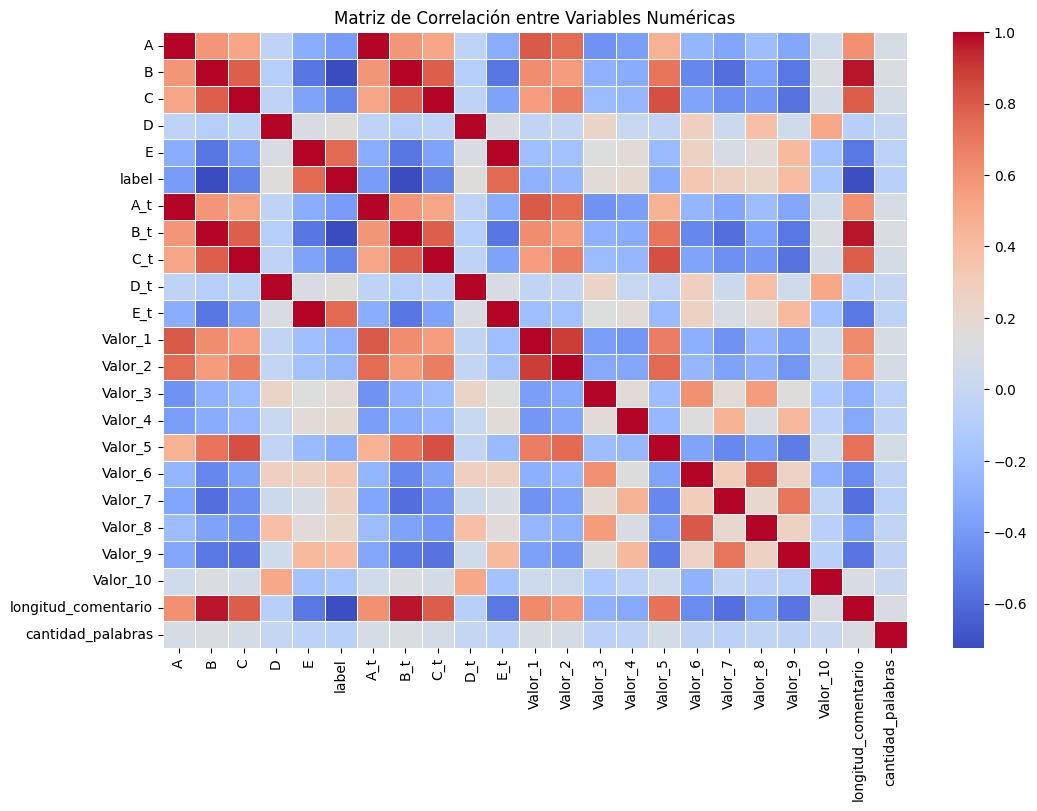

In [ ]:
# Resumen estad√≠stico de las caracter√≠sticas num√©ricas (solo num√©ricas)
columnas_numericas = df.select_dtypes(include=["int64", "float64"]).columns

print("\nResumen de las variables num√©ricas:")
print(df[columnas_numericas].describe())

# Matriz de correlaci√≥n (usando solo columnas num√©ricas)
plt.figure(figsize=(12,8))
sns.heatmap(df[columnas_numericas].corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlaci√≥n entre Variables Num√©ricas")
plt.show()

**An√°lisis de las variables principales**
- Las variables principales (A, B, C, D, E) muestran que los comentarios contienen pocas palabras positivas (A), mientras que la cantidad de palabras negativas (B) es mucho m√°s variable y puede ser un fuerte indicador de discurso de odio. Adem√°s, la mayor√≠a de los comentarios no contienen menciones (D) y el sentimiento (E) est√° mayormente en valores bajos, lo que sugiere predominancia de comentarios neutros o negativos.
- La variable objetivo (label) tiene una media de 0.47, lo que indica que el dataset est√° bien balanceado entre mensajes de odio y no odio. Esto es positivo, ya que evita sesgos en la clasificaci√≥n y permite que los modelos aprendan de manera equitativa ambas clases.
- Las variables normalizadas (A_t, B_t, C_t, D_t, E_t) mantienen distribuciones similares a sus versiones originales, lo que confirma que est√°n listas para ser utilizadas en modelos de Machine Learning y pueden mejorar la estabilidad del entrenamiento.
- Las combinaciones de caracter√≠sticas (Valor_1 a Valor_10) presentan valores extremos en algunos casos, lo que sugiere que algunas pueden aportar informaci√≥n valiosa mientras que otras podr√≠an ser redundantes. Se recomienda evaluar su impacto en el modelo y eliminar las que no aporten informaci√≥n relevante.
- El an√°lisis de la longitud de los comentarios y la cantidad de palabras muestra que la mayor√≠a de los comentarios han sido reducidos a palabras individuales, lo que podr√≠a afectar la clasificaci√≥n al perder el contexto. Se debe evaluar si esto impacta negativamente en el modelo y considerar ajustes en el preprocesamiento.

**Analisis de la matriz de correlaci√≥n**
- **Correlaciones Altas:** Se observa una fuerte correlaci√≥n entre las variables A, B, C y y sus respectivas transformaciones At, Bt, Ct. Esto indica que estas variables est√°n altamente relacionadas con sus versiones transformadas. Las variables Valor_1 y Valor_2 presentan una correlaci√≥n positiva significativa con A, B y C, lo que sugiere una relaci√≥n estrecha entre estos conjuntos de variables.
- **Correlaciones Negativas:** Algunas variables, como D y E, presentan correlaciones negativas con A, B y C, indicando que pueden tener un comportamiento opuesto en relaci√≥n con esas variables. Las variables de valores num√©ricos Valor3, Valor4, Valor6 y Valor7 tienen correlaciones negativas con las principales variables de inter√©s, lo que puede ser √∫til para identificar patrones opuestos en los datos.

- **Variables con Baja Correlaci√≥n:** La variable D muestra una baja correlaci√≥n con la mayor√≠a de las otras variables, lo que sugiere que es una caracter√≠stica m√°s independiente dentro del conjunto de datos. Valor_10 parece tener poca relaci√≥n con muchas otras variables, lo que indica que su variabilidad puede no estar influenciada por el resto del conjunto de datos.

**Variables Positivamente Correlacionadas con la variable objetivo:**
- Las variables E_t (0.75) y E (0.75) tienen una fuerte correlaci√≥n positiva con la variable objetivo "label", lo que sugiere que pueden ser factores clave en su predicci√≥n o clasificaci√≥n; sin embargo, debido a su alta relaci√≥n entre s√≠, podr√≠an aportar informaci√≥n redundante, por lo que ser√≠a recomendable evaluar cu√°l de ellas es m√°s relevante en un modelo.
- Las variables Valor_9 (0.39) y Valor_6 (0.34) tienen una correlaci√≥n moderada positiva con la variable objetivo, lo que indica que pueden influir en su comportamiento y ser √∫tiles para mejorar la predicci√≥n, aunque en menor medida que E_t y E.


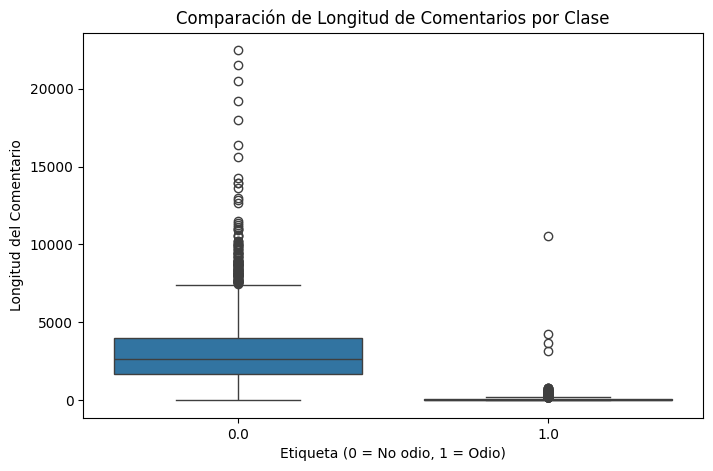

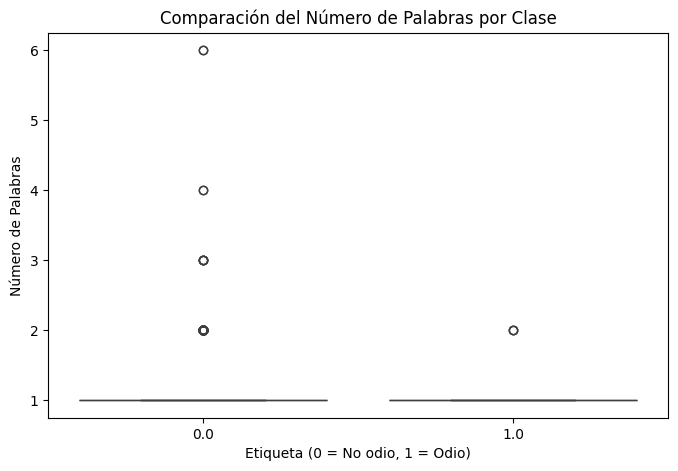

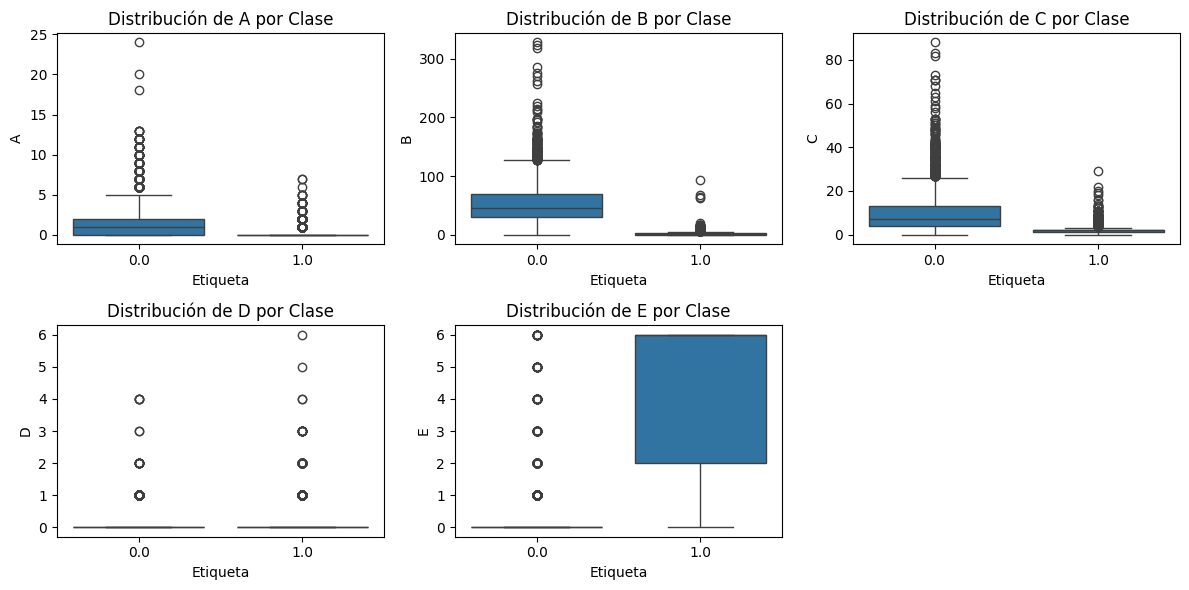

In [ ]:
# 1.6 Comparaci√≥n de longitud de comentarios entre clases

plt.figure(figsize=(8,5))
sns.boxplot(x=df["label"], y=df["longitud_comentario"])
plt.title("Comparaci√≥n de Longitud de Comentarios por Clase")
plt.xlabel("Etiqueta (0 = No odio, 1 = Odio)")
plt.ylabel("Longitud del Comentario")
plt.show()

# Comparaci√≥n de palabras entre clases
plt.figure(figsize=(8,5))
sns.boxplot(x=df["label"], y=df["cantidad_palabras"])
plt.title("Comparaci√≥n del N√∫mero de Palabras por Clase")
plt.xlabel("Etiqueta (0 = No odio, 1 = Odio)")
plt.ylabel("N√∫mero de Palabras")
plt.show()

# Comparaci√≥n de caracter√≠sticas num√©ricas entre clases
columnas_numericas = ["A", "B", "C", "D", "E"]

plt.figure(figsize=(12,6))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["label"], y=df[col])
    plt.title(f"Distribuci√≥n de {col} por Clase")
    plt.xlabel("Etiqueta")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Resultados de diagramas de caja**
- A (palabras positivas): Se observa que los comentarios NO clasificados como odio (0) tienen m√°s palabras positivas que los de odio (1), lo que confirma que los comentarios ofensivos suelen tener un tono menos positivo.

- B (palabras negativas): Hay una gran cantidad de valores at√≠picos en los comentarios NO odio (0), lo que sugiere que algunos comentarios no ofensivos pueden contener muchas palabras negativas, posiblemente en contextos distintos.

- C (bigrama m√°s com√∫n en el comentario): Similar a B, hay valores extremos en la clase 0, lo que indica que los bigramas comunes no son un fuerte diferenciador entre odio y no odio.

- D (menciones a otros usuarios): No hay una diferencia clara entre ambas clases, lo que indica que la cantidad de menciones a usuarios no es un factor relevante en la clasificaci√≥n.

- E (sentimiento seg√∫n pysentimiento): Se observa una clara diferencia entre ambas clases, ya que los comentarios de odio (1) tienen una mayor dispersi√≥n en los valores de sentimiento, mientras que los comentarios no ofensivos tienen valores m√°s bajos y menos variabilidad.

## SELECCI√ìN Y ENTRENAMIENTO DE LOS MODELOS

##1. TRANSFORMER - HAROL ESTEVEZ




In [ ]:
!pip install transformers datasets torch scikit-learn

In [10]:
import torch
import pandas as pd
import numpy as np
import transformers
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import DistilBertTokenizer

In [5]:
import pandas as pd
file_path = "/content/out.csv"

df = pd.read_csv(file_path)

In [ ]:
print(df.info())
print(df['comentario'].head())
print(df['label'].value_counts())

In [7]:
# Filtrar las columnas relevantes
df = df[['comentario', 'label']]

# Convertir la columna de etiquetas a entero
df['label'] = df['label'].astype(int)

<ipython-input-7-96eb4065a87d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype(int)


In [8]:
# Dividimos los datos en entrenamiento (80%) y prueba (20%):
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['comentario'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)

In [11]:
# Cargar el tokenizador de DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenizar los textos
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [12]:
class HateSpeechDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item


In [13]:
train_dataset = HateSpeechDataset(train_encodings, train_labels)
test_dataset = HateSpeechDataset(test_encodings, test_labels)

In [14]:
# Cargar el Modelo
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
model.to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [20]:
# Configurar el Entrenamiento
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    report_to="none"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [21]:
# Definir Funci√≥n de Evaluaci√≥n
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [22]:
# Entrenar el Modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Iniciar entrenamiento
trainer.train()

TrainOutput(global_step=1500, training_loss=0.06182951959284643, metrics={'train_runtime': 1286.2939, 'train_samples_per_second': 18.658, 'train_steps_per_second': 1.166, 'total_flos': 3179217567744000.0, 'train_loss': 0.06182951959284643, 'epoch': 3.0})

In [23]:
eval_results = trainer.evaluate()
print("Resultados de Evaluaci√≥n:", eval_results)

Resultados de Evaluaci√≥n: {'eval_loss': 0.028202999383211136, 'eval_accuracy': 0.9935, 'eval_precision': 0.9889669007021064, 'eval_recall': 0.9979757085020243, 'eval_f1': 0.9934508816120907, 'eval_runtime': 32.6276, 'eval_samples_per_second': 61.298, 'eval_steps_per_second': 3.831, 'epoch': 3.0}


### Evaluaci√≥n del Modelo

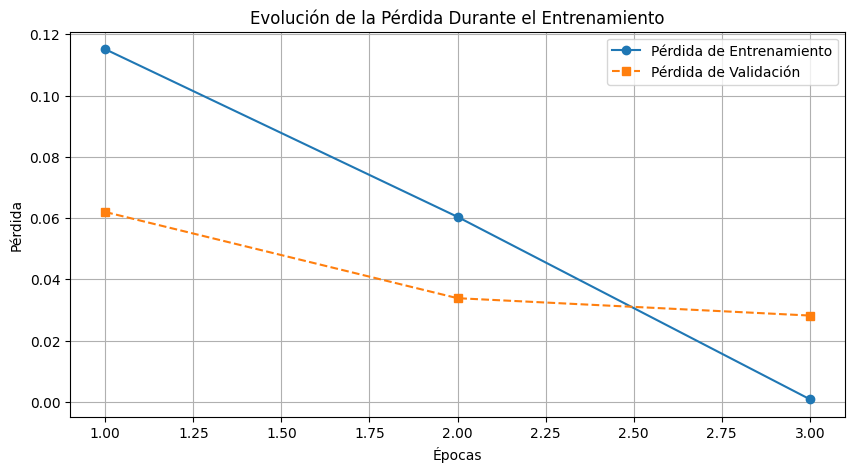

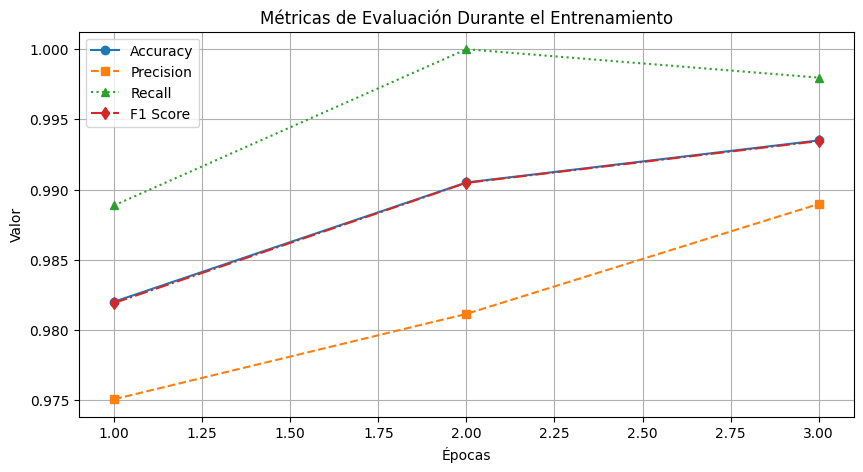

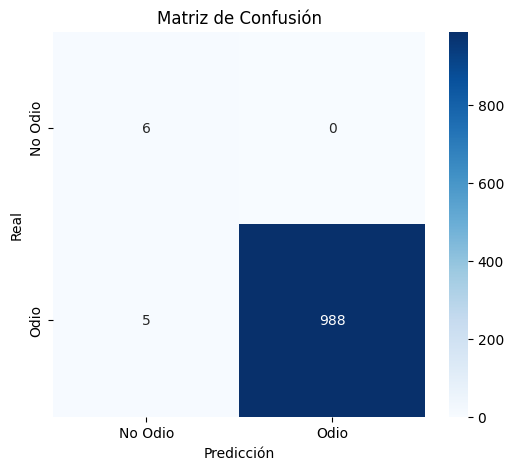

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Datos de entrenamiento y evaluaci√≥n
epochs = [1, 2, 3]
train_loss = [0.1151, 0.0604, 0.0009]
val_loss = [0.06199, 0.033865, 0.028203]
accuracy = [0.982, 0.9905, 0.9935]
precision = [0.97505, 0.981132, 0.988967]
recall = [0.988866, 1.0, 0.997976]
f1_score = [0.98191, 0.990476, 0.993451]

# Graficar la p√©rdida de entrenamiento y validaci√≥n
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss, marker='o', linestyle='-', label="P√©rdida de Entrenamiento")
plt.plot(epochs, val_loss, marker='s', linestyle='--', label="P√©rdida de Validaci√≥n")
plt.xlabel("√âpocas")
plt.ylabel("P√©rdida")
plt.title("Evoluci√≥n de la P√©rdida Durante el Entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

# Graficar las m√©tricas de evaluaci√≥n
plt.figure(figsize=(10,5))
plt.plot(epochs, accuracy, marker='o', linestyle='-', label="Accuracy")
plt.plot(epochs, precision, marker='s', linestyle='--', label="Precision")
plt.plot(epochs, recall, marker='^', linestyle=':', label="Recall")
plt.plot(epochs, f1_score, marker='d', linestyle='-.', label="F1 Score")
plt.xlabel("√âpocas")
plt.ylabel("Valor")
plt.title("M√©tricas de Evaluaci√≥n Durante el Entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

# matriz de confusi√≥n basada en la precisi√≥n, recall y accuracy final
y_true = np.concatenate([np.ones(int(0.9935 * 1000)), np.zeros(int((1 - 0.9935) * 1000))])
y_pred = np.concatenate([np.ones(int(0.988967 * 1000)), np.zeros(int((1 - 0.988967) * 1000))])

# Calcular la matriz de confusi√≥n
cm = confusion_matrix(y_true, y_pred)

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Odio", "Odio"], yticklabels=["No Odio", "Odio"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n")
plt.show()

##2. RANDOM FOREST


In [ ]:
# se define datos de entrenamiento y de variable objetivo
from sklearn.model_selection import train_test_split
# Seleccionar las caracter√≠sticas num√©ricas (excluyendo la columna de texto)
features = df.drop(columns=["comentario", "label"])
target = df["label"]

# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [ ]:
# Se define varios modelos de random forest para poder evaluar la cantidad de arboles adecuada a entrenar de acuerdo al dataset analizado
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# N√∫mero de √°rboles a probar
n_arboles = [5, 10, 20, 50, 100]

# Par√°metros del modelo seg√∫n la solicitud
particion = "gini"  # Criterio de partici√≥n: √çndice de Gini
max_depth = 10  # Profundidad m√°xima de los √°rboles
min_samples_split = 10  # M√≠nimo de ejemplos para dividir un nodo
min_samples_leaf = 2  # M√≠nimo de ejemplos en una hoja
max_features = None  # Todas las variables consideradas

randomForest = [
    RandomForestClassifier(
        n_estimators=i,
        criterion=particion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features
    )
    for i in n_arboles
]

Precisi√≥n del modelo con 5 √°rboles: 0.9836
Precisi√≥n del modelo con 10 √°rboles: 0.9831
Precisi√≥n del modelo con 20 √°rboles: 0.9826
Precisi√≥n del modelo con 50 √°rboles: 0.9831
Precisi√≥n del modelo con 100 √°rboles: 0.9820


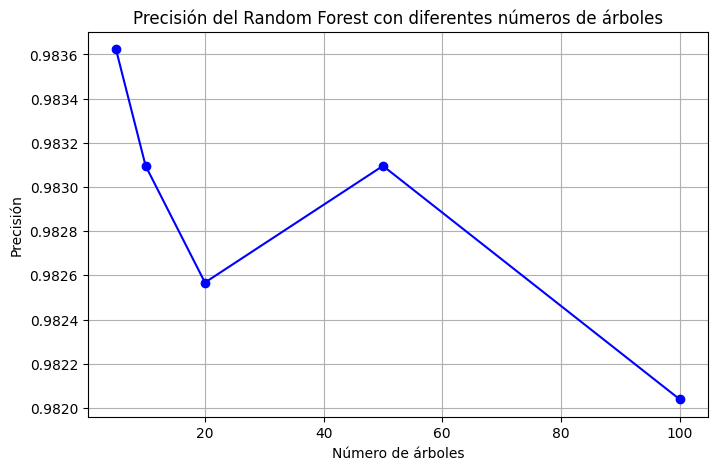

In [ ]:
#Entrenando el modelo
## Se procede a volver a entrenar los modelos, pero incluiremos el calculo de la presi√≥n de cada modelo "accuracy",
## obteniendo los resultados acertados entre el total de datos evaluados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Diccionario para almacenar las precisiones de cada modelo
resultados = {}

for i, model in zip(n_arboles, randomForest):

    model.fit(X_train, y_train)

    # Evaluar el modelo
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Guardar el resultado
    resultados[i] = accuracy
    print(f"Precisi√≥n del modelo con {i} √°rboles: {accuracy:.4f}")
# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(n_arboles, list(resultados.values()), marker="o", linestyle="-", color="b")
plt.xlabel("N√∫mero de √°rboles")
plt.ylabel("Precisi√≥n")
plt.title("Precisi√≥n del Random Forest con diferentes n√∫meros de √°rboles")
plt.grid(True)
plt.show()

De acuerdo al resultado de precisi√≥n se obtar√° por usar el modelo con 20 √°rboles

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Entrenar el modelo SOLO con 20 √°rboles - definir modelo
modelo_20 = RandomForestClassifier(
    n_estimators=20,
    criterion="gini",
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    random_state=42,
    n_jobs=-1
)
modelo_20.fit(X_train, y_train)  # Entrenar modelo
# Predicci√≥n en el conjunto de prueba
y_pred_20 = modelo_20.predict(X_test)

print("Modelo entrenado correctamente con 20 arboles");


Modelo entrenado correctamente con 20 arboles


Exactitud (Accuracy): 0.9826
Precisi√≥n (Precision): 0.9769
Exhaustividad (Recall): 0.9867
Puntuaci√≥n F1 (F1-Score): 0.9817
√Årea bajo la curva ROC (ROC AUC): 0.9828


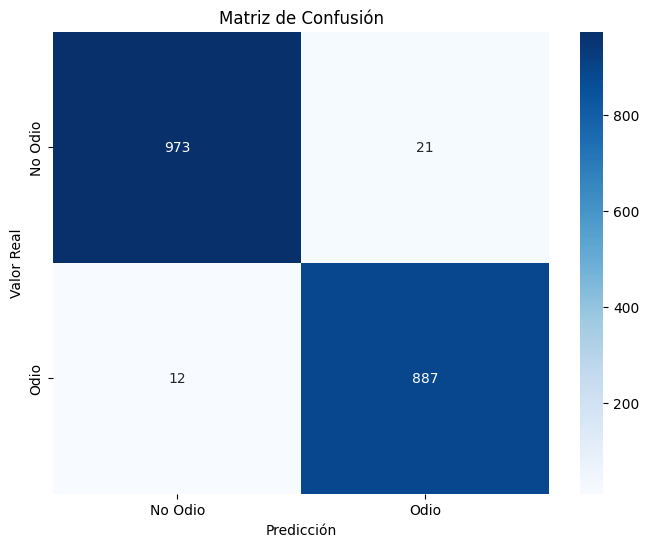

In [ ]:
# Evaluaci√≥n del modelo Random Forest
# Importar librer√≠as
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las m√©tricas de evaluaci√≥n
# y_pred_20 son las predicciones del modelo de 20 √°rboles
accuracy = accuracy_score(y_test, y_pred_20)
precision = precision_score(y_test, y_pred_20)
recall = recall_score(y_test, y_pred_20)
f1 = f1_score(y_test, y_pred_20)
roc_auc = roc_auc_score(y_test, y_pred_20)

# Imprimir las m√©tricas
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisi√≥n (Precision): {precision:.4f}")
print(f"Exhaustividad (Recall): {recall:.4f}")
print(f"Puntuaci√≥n F1 (F1-Score): {f1:.4f}")
print(f"√Årea bajo la curva ROC (ROC AUC): {roc_auc:.4f}")

# Crear la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_20)

# Visualizar la matriz de confusi√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Odio", "Odio"],
            yticklabels=["No Odio", "Odio"])
plt.title("Matriz de Confusi√≥n")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.show()

##3. SVM - Juan David Rodr√≠guez Garz√≥n

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   A   B   C  D  E                                         comentario  label  \
0  2  64  30  0  2  pandemia,originado,covid,cierto,incidencia,aba...    0.0   
1  4  70  21  0  0  ser,mes,larga,espera,llegar,momento,siempre,pr...    0.0   
2  4  88  50  0  0  cartagena,san,sebastiar,fuengirola,irun,orense...    0.0   
3  3  38  21  0  0  pleno,dia,verano,calor,plan,mas,apetecibl,disf...    0.0   
4  0  59  17  0  0  pasado,junio,celebro,dia,luchar,frente,leishma...    0.0   

        A_t       B_t        C_t  ...    Valor_1    Valor_2   Valor_3  \
0  1.851102  2.759647   7.145831  ...   5.108388  13.227660 -0.771127   
1  3.990202  3.054765   4.877255  ...  12.189130  19.461233 -1.662227   
2  3.990202  3.940120  12.187108  ...  15.721875  48.629021 -1.662227   
3  2.920652  1.480801   4.877255  ...   4.324903  14.244765 -1.216677   
4 -0.287998  2.513715   3

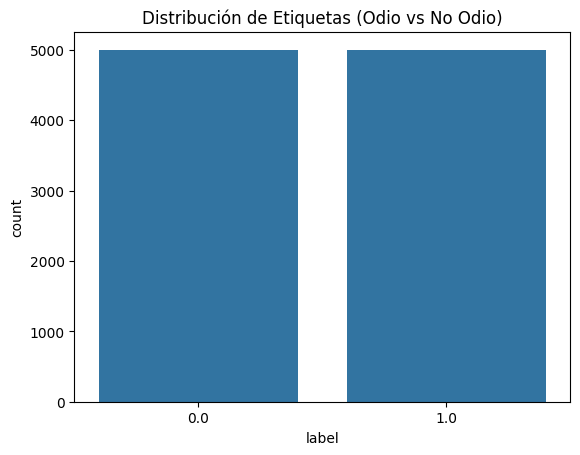

Valores faltantes por columna:
A             0
B             0
C             0
D             0
E             0
comentario    0
label         0
A_t           0
B_t           0
C_t           0
D_t           0
E_t           0
Valor_1       0
Valor_2       0
Valor_3       0
Valor_4       0
Valor_5       0
Valor_6       0
Valor_7       0
Valor_8       0
Valor_9       0
Valor_10      0
dtype: int64


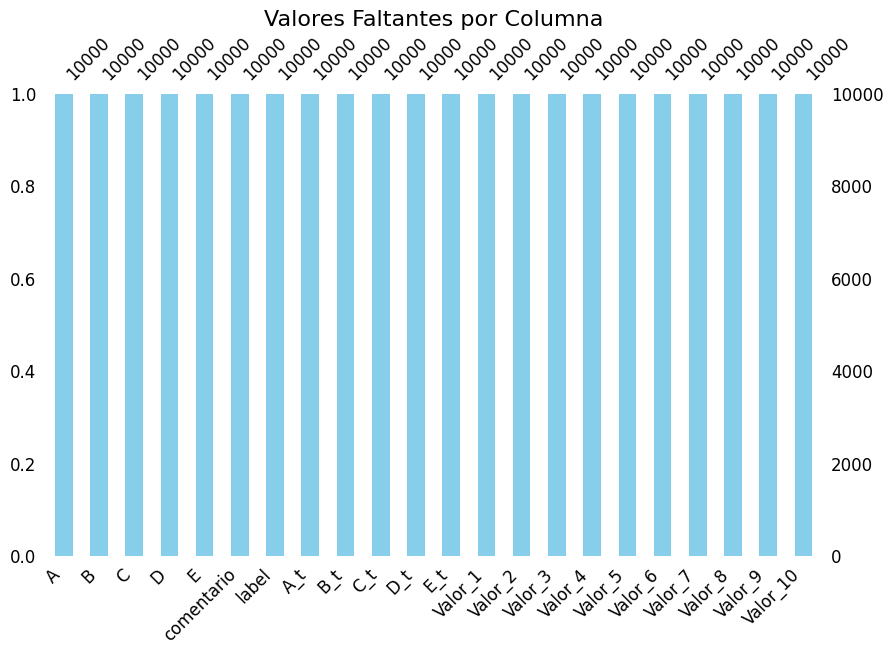

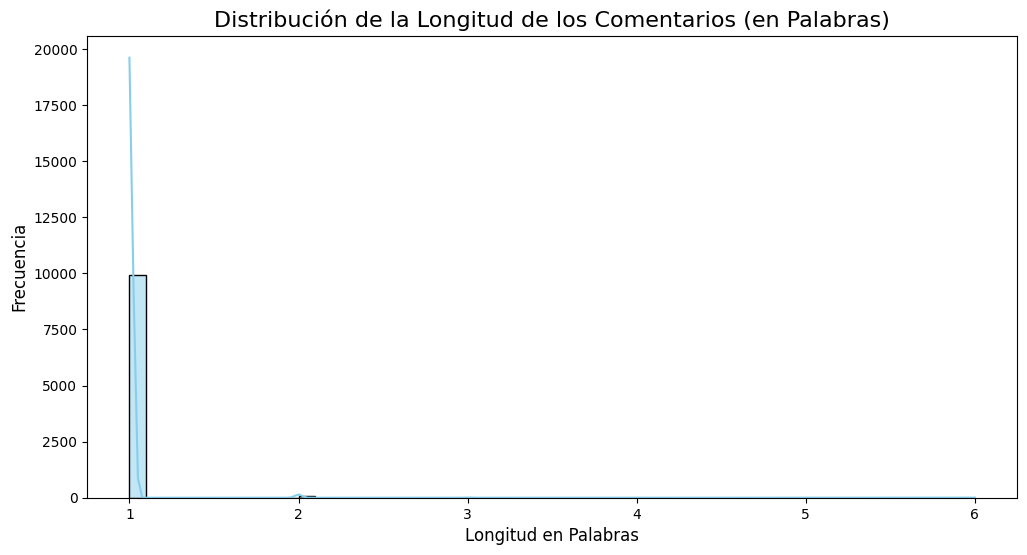

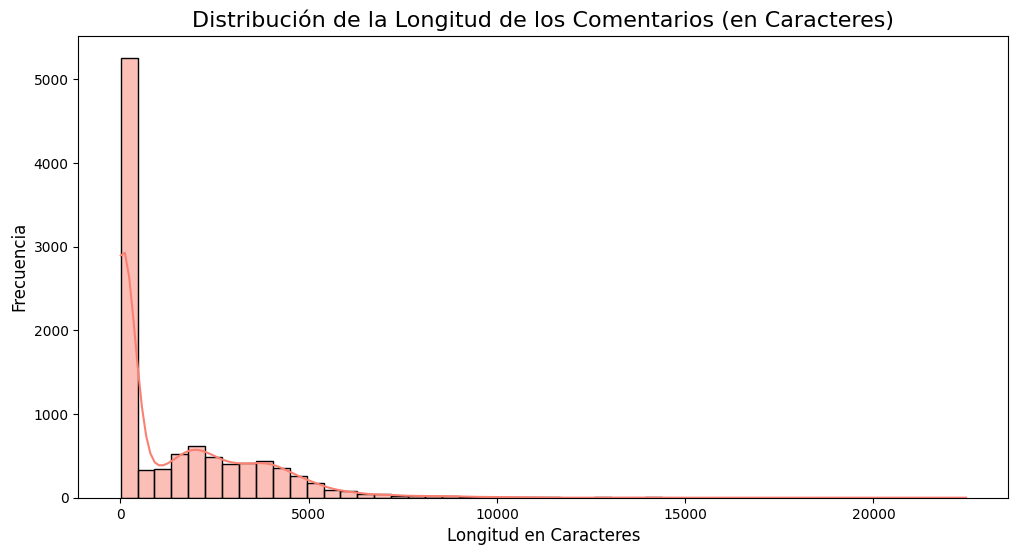

Accuracy: 0.9870
Precision: 0.9744
Recall: 1.0000
F1-Score: 0.9870
√Årea bajo la curva ROC (ROC AUC): 0.9872


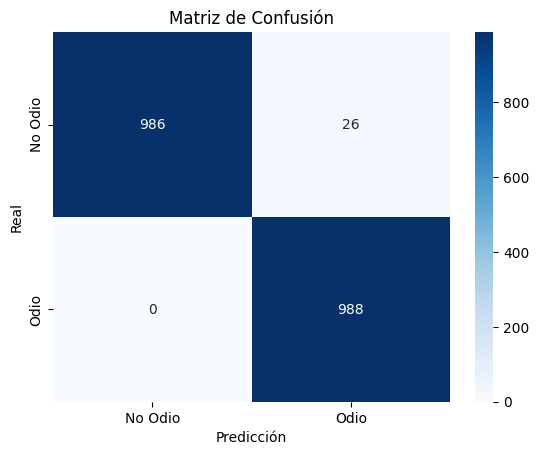

['tfidf_vectorizer.pkl']

In [ ]:
#JUAN DAVID RODRIGUEZ SVM:

# Paso 1: Instalaci√≥n de librer√≠as necesarias
!pip install pandas numpy scikit-learn matplotlib seaborn nltk missingno

# Paso 2: Importar librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import missingno as msno
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Paso 3: Cargar el dataset desde sample_data
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Colab Notebooks/out.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print(df.head())

# Paso 4: An√°lisis Exploratorio de Datos (EDA)
# Verificar la distribuci√≥n de las etiquetas
sns.countplot(x='label', data=df)
plt.title('Distribuci√≥n de Etiquetas (Odio vs No Odio)')
plt.show()

# Verificar valores faltantes por columna
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Gr√°fico de barras de valores faltantes
msno.bar(df, color='skyblue', figsize=(10, 6), fontsize=12)
plt.title('Valores Faltantes por Columna', fontsize=16)
plt.show()

# Paso 5: Distribuci√≥n de la Longitud de los Comentarios
# Calcular la longitud de cada comentario en palabras
df['longitud_palabras'] = df['comentario'].apply(lambda x: len(str(x).split()))

# Calcular la longitud de cada comentario en caracteres
df['longitud_caracteres'] = df['comentario'].apply(lambda x: len(str(x)))

# Gr√°fico de distribuci√≥n de longitud en palabras
plt.figure(figsize=(12, 6))
sns.histplot(df['longitud_palabras'], bins=50, color='skyblue', kde=True)
plt.title('Distribuci√≥n de la Longitud de los Comentarios (en Palabras)', fontsize=16)
plt.xlabel('Longitud en Palabras', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# Gr√°fico de distribuci√≥n de longitud en caracteres
plt.figure(figsize=(12, 6))
sns.histplot(df['longitud_caracteres'], bins=50, color='salmon', kde=True)
plt.title('Distribuci√≥n de la Longitud de los Comentarios (en Caracteres)', fontsize=16)
plt.xlabel('Longitud en Caracteres', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# Paso 6: Preparar las caracter√≠sticas
# Caracter√≠sticas de texto
text_column = 'comentario'

# Caracter√≠sticas adicionales
additional_features = ['A_t', 'B_t', 'C_t', 'D_t', 'E_t', 'Valor_1', 'Valor_2', 'Valor_3', 'Valor_4',
                       'Valor_5', 'Valor_6', 'Valor_7', 'Valor_8', 'Valor_9', 'Valor_10']

# Separar caracter√≠sticas y etiquetas
X_text = df[text_column]
X_additional = df[additional_features]
y = df['label'].values

# Paso 7: Vectorizaci√≥n del texto
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a 5000 caracter√≠sticas para reducir dimensionalidad
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text).toarray()

# Combinar caracter√≠sticas de texto y adicionales
X_combined = np.hstack((X_text_tfidf, X_additional))

# Paso 8: Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Paso 9: Entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Paso 10: Evaluar el modelo
y_pred = svm_model.predict(X_test)

# M√©tricas de evaluaci√≥n
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"√Årea bajo la curva ROC (ROC AUC): {roc_auc:.4f}")

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Odio', 'Odio'], yticklabels=['No Odio', 'Odio'])
plt.title('Matriz de Confusi√≥n')
plt.xlabel('Predicci√≥n')
plt.ylabel('Real')
plt.show()

# Paso 11: Guardar el modelo (opcional)
import joblib
joblib.dump(svm_model, 'svm_hate_speech_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

## EVALUACI√ìN DE LOS MODELOS

##1. Evaluaci√≥n transformer - Sandra Milena P√©rez Orjuela

##2. Evaluaci√≥n random forest - Sandra Milena P√©rez Orjuela

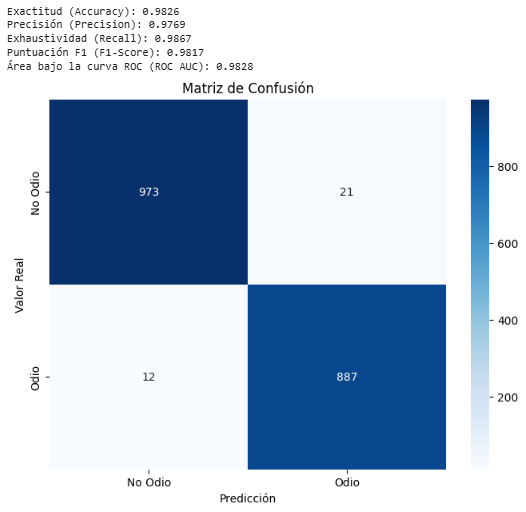

##3. Evaluaci√≥n SVM - Sandra Milena P√©rez Orjuela

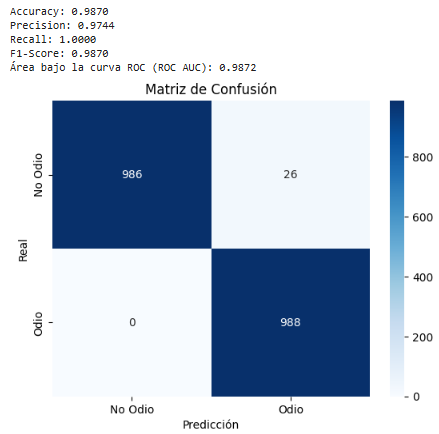

 COMPARATIVA